In [ ]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [10]:
def AUC_ROC_Binary(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    fpr, tpr, thresholds = roc_curve(y_true, y_score,pos_label=1)
    score_value = roc_auc_score(y_true=y_true, y_score=y_score)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC for the Prediction of Binary Race (White:P vs non-White:N)')
    plt.plot(y_score,y_score,'--k')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def AUC_Precision_Recall(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    plt.figure(dpi=150)
    auc_score = auc(y=precision, x=recall)
    # ,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value)
    plt.plot(recall[::10],precision[::10],label="White vs African-American/Asian \n (precision-recall AUC={:.2f})".format(auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('AUC-ROC for the Prediction of Binary Race (White:P vs non-White:N)')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def prob2categ(y_true,y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    gmeans = np.sqrt(tpr * (1-fpr))
    return gmeans[np.argmax(gmeans)]



339/339 [==============================] - 0s 1ms/step


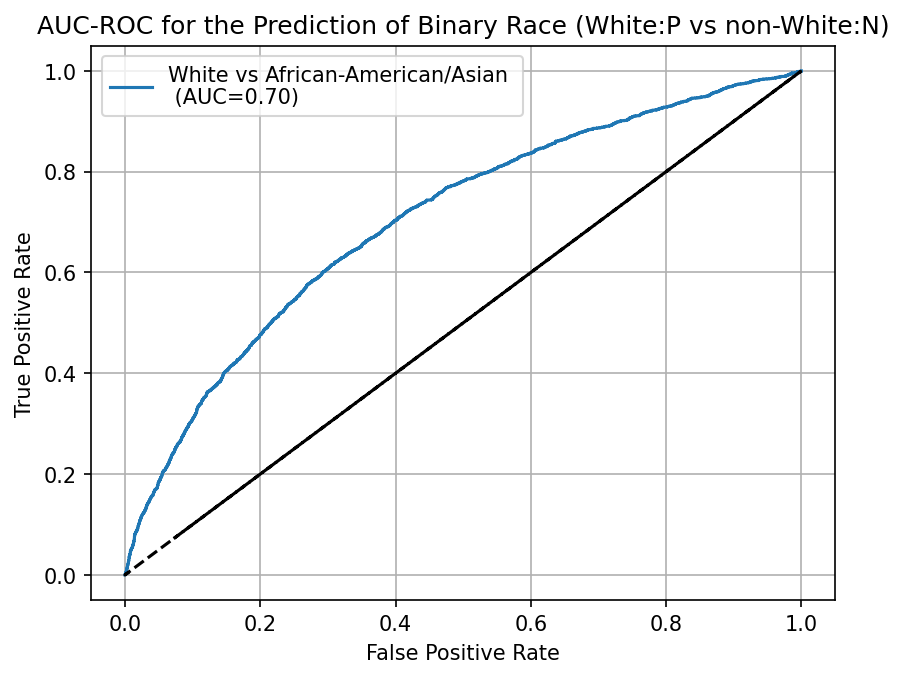

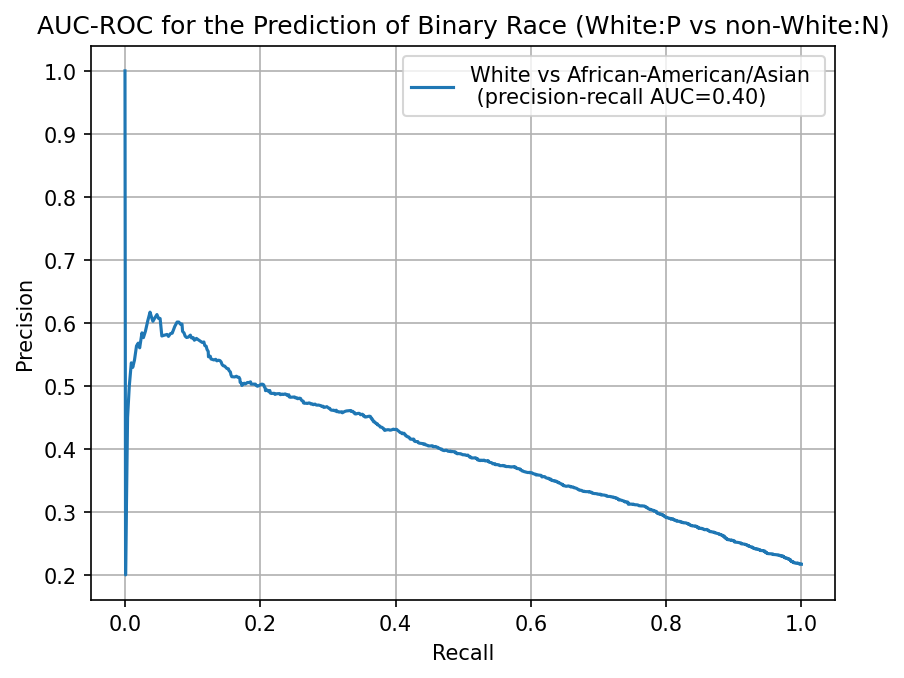

The optimum Threshold is: 0.65
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      8484
         1.0       0.48      0.25      0.33      2349

    accuracy                           0.78     10833
   macro avg       0.65      0.59      0.60     10833
weighted avg       0.74      0.78      0.75     10833

[[7862  622]
 [1770  579]]


In [12]:
name = 'mimic_race_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_total = test_data['x_test']
y_mimic_total = test_data['y_test']
mask_mimic_total = test_data['mask_excluded']
model_mimic_total = load_model(name + '_mdl.h5')
y_predict_mimic_total = model_mimic_total.predict(x_mimic_total[:,mask_mimic_total])
AUC_ROC_Binary(y_true=y_mimic_total,y_score=y_predict_mimic_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_mimic_total)
threshold = prob2categ(y_mimic_total,y_predict_mimic_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_total, y_pred=class_pred)
print(cm)

339/339 [==============================] - 0s 987us/step


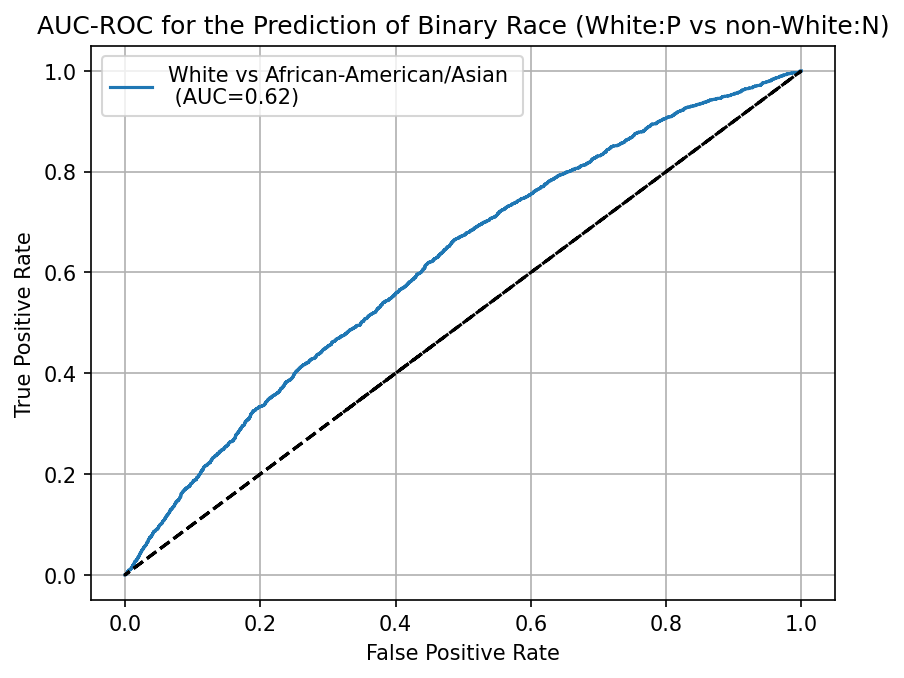

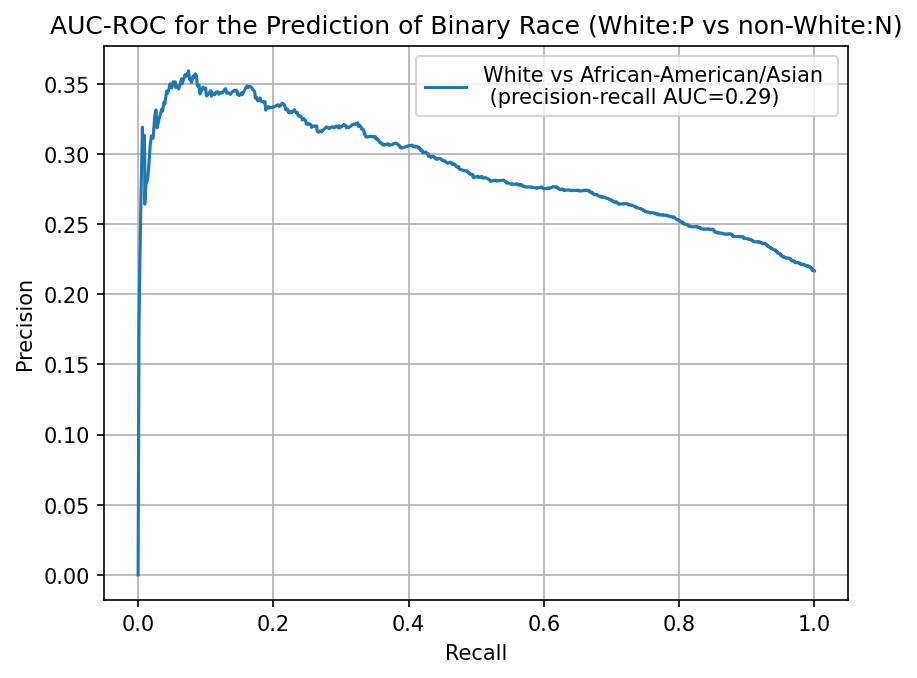

The optimum Threshold is: 0.58
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      8484
         1.0       0.34      0.11      0.16      2349

    accuracy                           0.76     10833
   macro avg       0.57      0.52      0.51     10833
weighted avg       0.70      0.76      0.71     10833

[[8013  471]
 [2102  247]]


In [15]:
name = 'mimic_race__segment_0__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_0 = test_data['x_test']
y_mimic_seg_0 = test_data['y_test']
mask_mimic_seg_0 = test_data['mask_excluded']
model_mimic_seg_0 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_0 = model_mimic_seg_0.predict(x_mimic_seg_0[:,mask_mimic_seg_0])
AUC_ROC_Binary(y_true=y_mimic_seg_0,y_score=y_predict_mimic_seg_0)
AUC_Precision_Recall(y_true=y_mimic_seg_0,y_score=y_predict_mimic_seg_0)
threshold = prob2categ(y_mimic_seg_0,y_predict_mimic_seg_0)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_0.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_0, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_0, y_pred=class_pred)
print(cm)

339/339 [==============================] - 0s 908us/step


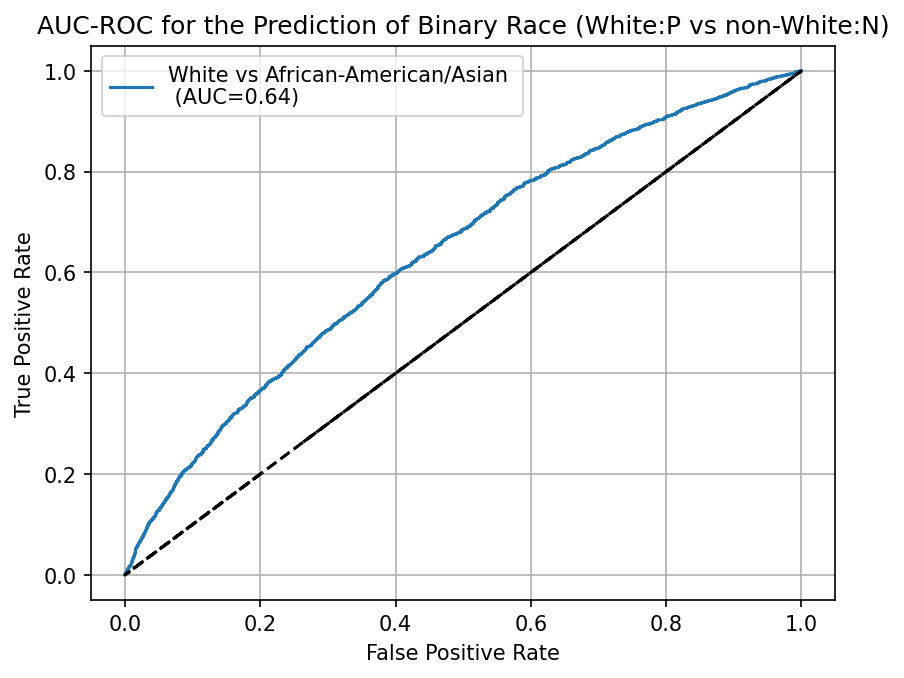

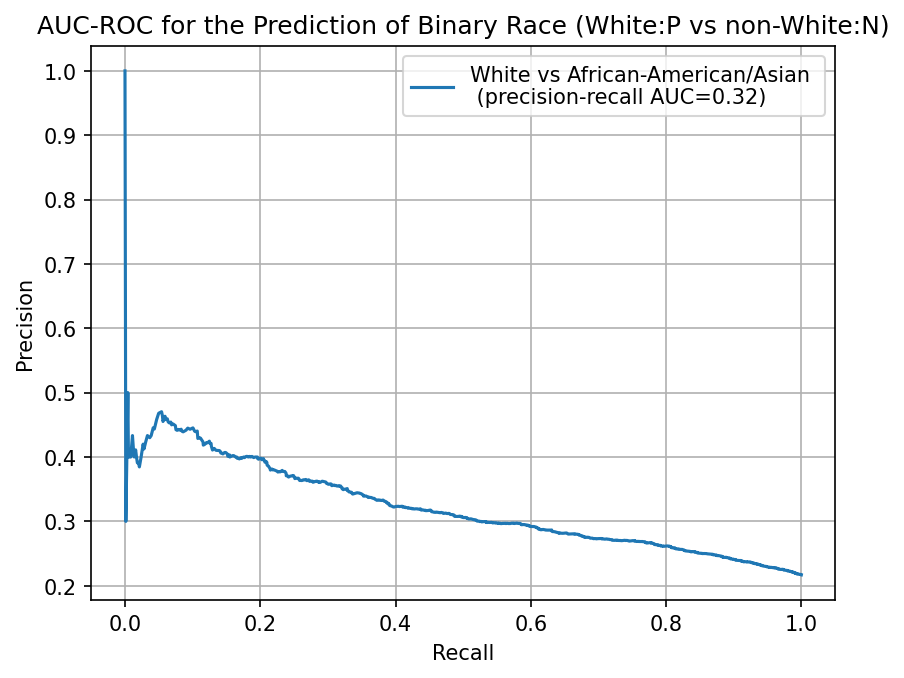

The optimum Threshold is: 0.60
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      8484
         1.0       0.44      0.11      0.17      2349

    accuracy                           0.78     10833
   macro avg       0.62      0.53      0.52     10833
weighted avg       0.72      0.78      0.72     10833

[[8166  318]
 [2098  251]]


In [16]:
name = 'mimic_race__segment_1__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_1 = test_data['x_test']
y_mimic_seg_1 = test_data['y_test']
mask_mimic_seg_1 = test_data['mask_excluded']
model_mimic_seg_1 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_1 = model_mimic_seg_1.predict(x_mimic_seg_1[:,mask_mimic_seg_1])
AUC_ROC_Binary(y_true=y_mimic_seg_1,y_score=y_predict_mimic_seg_1)
AUC_Precision_Recall(y_true=y_mimic_seg_1,y_score=y_predict_mimic_seg_1)
threshold = prob2categ(y_mimic_seg_1,y_predict_mimic_seg_1)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_1.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_1, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_1, y_pred=class_pred)
print(cm)

339/339 [==============================] - 0s 698us/step


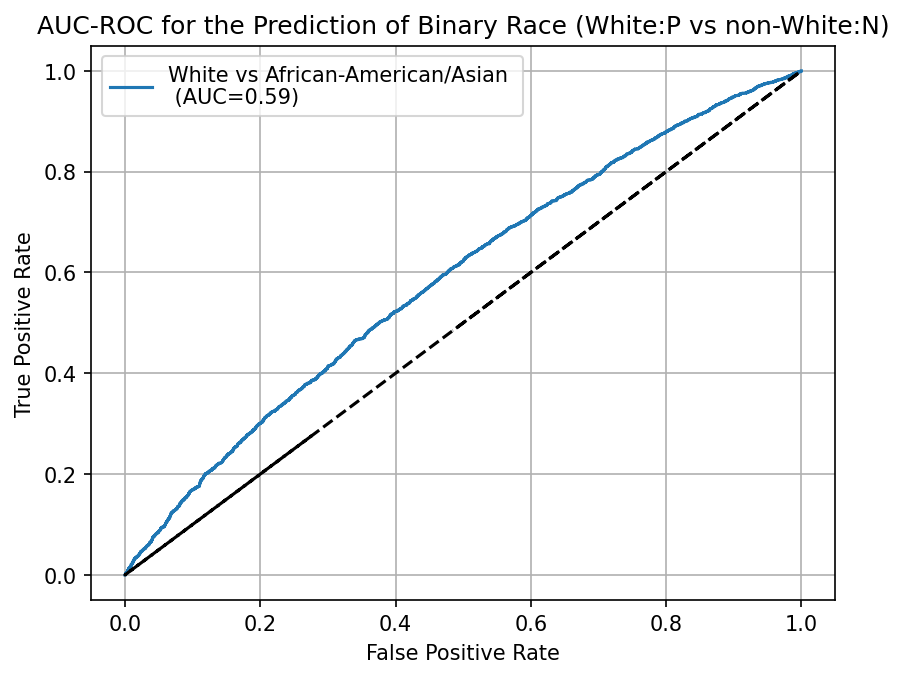

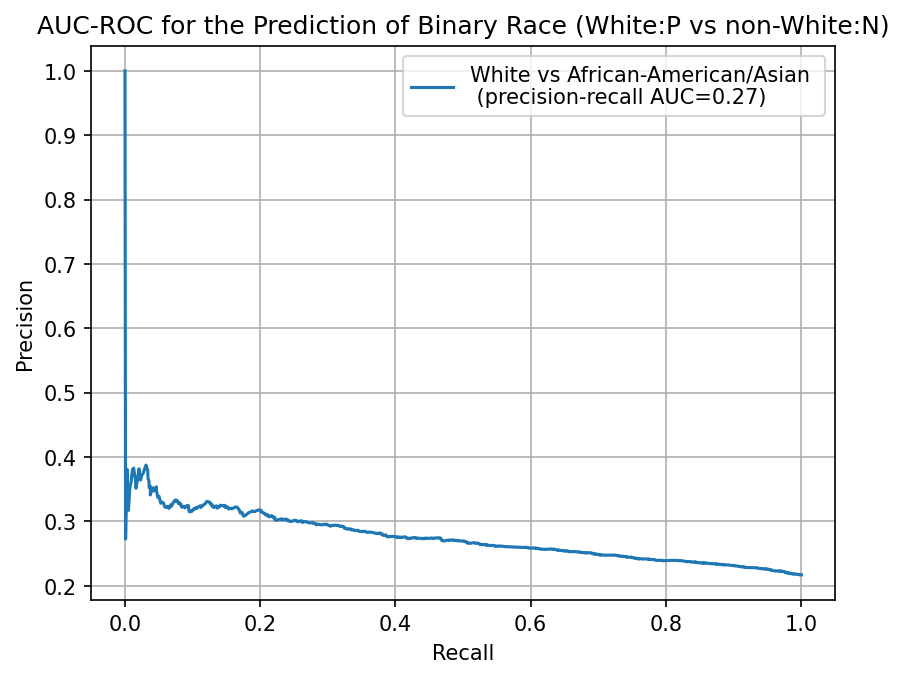

The optimum Threshold is: 0.56
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      8484
         1.0       0.32      0.07      0.11      2349

    accuracy                           0.77     10833
   macro avg       0.56      0.51      0.49     10833
weighted avg       0.69      0.77      0.70     10833

[[8149  335]
 [2188  161]]


In [19]:
name = 'mimic_race__segment_2__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_2 = test_data['x_test']
y_mimic_seg_2 = test_data['y_test']
mask_mimic_seg_2 = test_data['mask_excluded']
model_mimic_seg_2 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_2 = model_mimic_seg_2.predict(x_mimic_seg_2[:,mask_mimic_seg_2])
AUC_ROC_Binary(y_true=y_mimic_seg_2,y_score=y_predict_mimic_seg_2)
AUC_Precision_Recall(y_true=y_mimic_seg_2,y_score=y_predict_mimic_seg_2)
threshold = prob2categ(y_mimic_seg_2,y_predict_mimic_seg_2)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_2.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_2, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_2, y_pred=class_pred)
print(cm)

339/339 [==============================] - 0s 883us/step


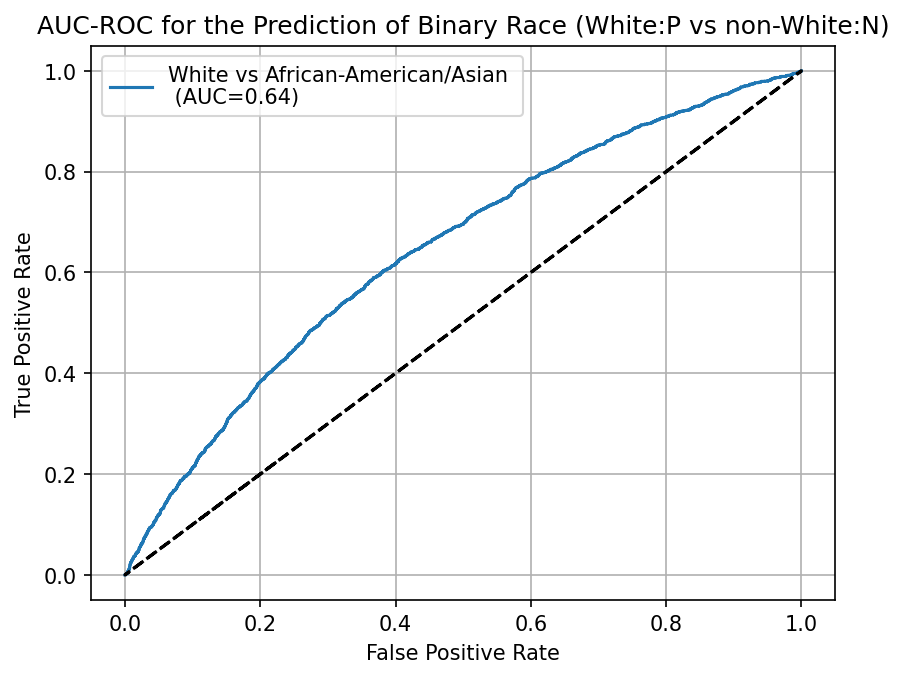

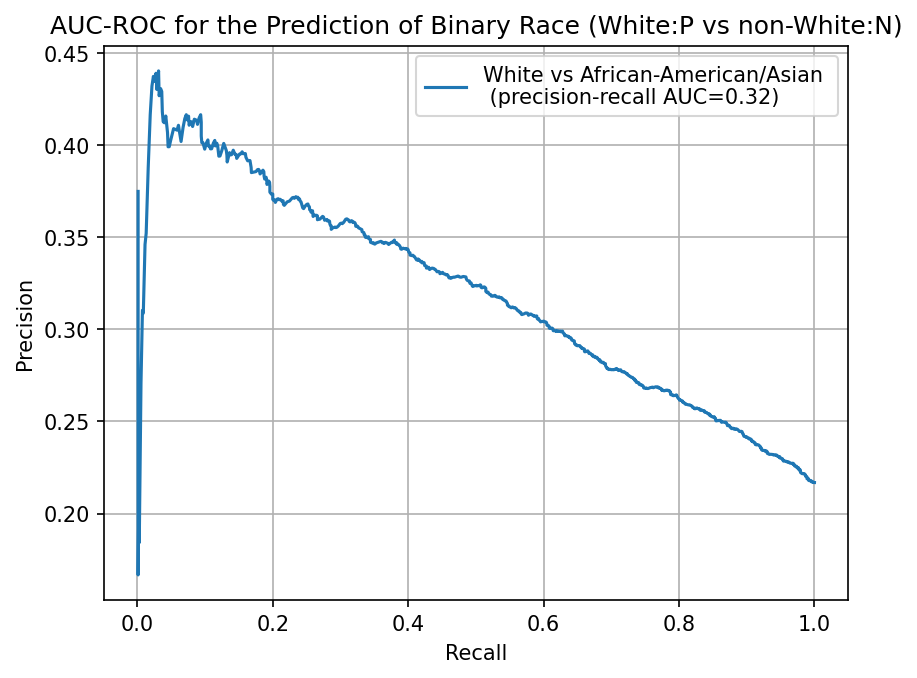

The optimum Threshold is: 0.61
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      8484
         1.0       0.40      0.10      0.17      2349

    accuracy                           0.77     10833
   macro avg       0.60      0.53      0.52     10833
weighted avg       0.71      0.77      0.72     10833

[[8114  370]
 [2103  246]]


In [18]:
name = 'mimic_race__segment_3__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_mimic_seg_3 = test_data['x_test']
y_mimic_seg_3 = test_data['y_test']
mask_mimic_seg_3 = test_data['mask_excluded']
model_mimic_seg_3 = load_model(name + '_mdl.h5')
y_predict_mimic_seg_3 = model_mimic_seg_3.predict(x_mimic_seg_3[:,mask_mimic_seg_3])
AUC_ROC_Binary(y_true=y_mimic_seg_3,y_score=y_predict_mimic_seg_3)
AUC_Precision_Recall(y_true=y_mimic_seg_3,y_score=y_predict_mimic_seg_3)
threshold = prob2categ(y_mimic_seg_3,y_predict_mimic_seg_3)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_mimic_seg_3.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_mimic_seg_3, y_pred=class_pred))
cm = confusion_matrix(y_true=y_mimic_seg_3, y_pred=class_pred)
print(cm)